## Assignment

# 1. Text 특화

### 1) 기존방법

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
(x_train, train_label), (x_test, test_label)=imdb.load_data(num_words=10000) 
#여기에 나오는 단어수는 1만개만 사용하겠다. (가장 빈번한 만개) / 정확히는 9999개임. 첫번째 열은 0으로써 의미가 없기 때문.
print(x_train.shape)
print(x_test.shape)

17465344/17464789 [==============================] - 0s 0us/step
(25000,)
(25000,)


In [0]:
x_train=sequence.pad_sequences(x_train,maxlen=100) # 단어들의 앞에서 100개씩만 쓰겠다. (100개만 padding함.) - 100개의 데이터로 평가함.
x_test=sequence.pad_sequences(x_test,maxlen=100) #만약 100개가 안되면, 앞에 0을 채우게 됨.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding,Dropout # embedding이 있음.
imdb=Sequential()
imdb.add(Embedding(10000,95,input_length=100)) # input_length는 window size 

In [4]:
imdb.add(Flatten())
imdb.add(Dropout(0.5))
imdb.add(Dense(1, activation='sigmoid')) # positive or negative 를 바라보기 때문.
imdb.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 95)           950000    
_________________________________________________________________
flatten (Flatten)            (None, 9500)              0         
_________________________________________________________________
dropout (Dropout)            (None, 9500)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9501      
Total params: 959,501
Trainable params: 959,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
imdb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
result=imdb.fit(x_train, train_label, epochs=10,batch_size=32, validation_split=0.15) #validation을 0.15로

Train on 21250 samples, validate on 3750 samples
Epoch 1/10
21250/21250 [==============================] - 20s 932us/sample - loss: 0.5339 - acc: 0.7346 - val_loss: 0.3976 - val_acc: 0.8123
Epoch 2/10
21250/21250 [==============================] - 17s 794us/sample - loss: 0.3025 - acc: 0.8716 - val_loss: 0.3466 - val_acc: 0.8507
Epoch 3/10
21250/21250 [==============================] - 17s 783us/sample - loss: 0.2293 - acc: 0.9072 - val_loss: 0.3333 - val_acc: 0.8605
Epoch 4/10
21250/21250 [==============================] - 17s 780us/sample - loss: 0.1732 - acc: 0.9354 - val_loss: 0.3441 - val_acc: 0.8565
Epoch 5/10
21250/21250 [==============================] - 17s 782us/sample - loss: 0.1241 - acc: 0.9584 - val_loss: 0.3576 - val_acc: 0.8544
Epoch 6/10
21250/21250 [==============================] - 17s 806us/sample - loss: 0.0847 - acc: 0.9738 - val_loss: 0.3763 - val_acc: 0.8488
Epoch 7/10
21250/21250 [==============================] - 18s 825us/sample - loss: 0.0546 - acc: 0.9847 -

In [0]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure() #이건 새로운 figure 창을 띄우는 method
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### 2) overfitting 줄인 방법

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.regularizers import l1,l2
(x_train, train_label), (x_test, test_label)=imdb.load_data(num_words=10000) 
#여기에 나오는 단어수는 1만개만 사용하겠다. (가장 빈번한 만개) / 정확히는 9999개임. 첫번째 열은 0으로써 의미가 없기 때문.
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [0]:
x_train=sequence.pad_sequences(x_train,maxlen=500) # 단어들의 앞에서 100개씩만 쓰겠다. (100개만 padding함.) - 100개의 데이터로 평가함.
x_test=sequence.pad_sequences(x_test,maxlen=500) #만약 100개가 안되면, 앞에 0을 채우게 됨.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding,Dropout # embedding이 있음.

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stopping = EarlyStopping('val_loss',mode='min',patience=3)

In [0]:
imdb=Sequential()
imdb.add(Embedding(10000,20,input_length=500)) # input_length는 window size 
imdb.add(Flatten())
imdb.add(Dropout(0.5))
imdb.add(Dense(64, activation='relu'))
imdb.add(Dropout(0.5))
imdb.add(Dense(1, activation='sigmoid',kernel_regularizer=l1(0.1))) 
imdb.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_76 (Embedding)     (None, 500, 20)           200000    
_________________________________________________________________
flatten_77 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dropout_210 (Dropout)        (None, 10000)             0         
_________________________________________________________________
dense_209 (Dense)            (None, 64)                640064    
_________________________________________________________________
dropout_211 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_210 (Dense)            (None, 1)                 65        
Total params: 840,129
Trainable params: 840,129
Non-trainable params: 0
_______________________________________________

In [8]:
imdb=Sequential()
imdb.add(Embedding(10000,20,input_length=500)) # input_length는 window size 
imdb.add(Flatten())
imdb.add(Dropout(0.5))
imdb.add(Dense(64, activation='relu'))
imdb.add(Dropout(0.5))
imdb.add(Dense(1, activation='sigmoid',kernel_regularizer=l1(0.1))) 
imdb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 20)           200000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 840,129
Trainable params: 840,129
Non-trainable params: 0
________________________________________________

In [11]:
imdb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
result=imdb.fit(x_train, train_label, epochs=7,batch_size=64, validation_split=0.15) 

Epoch 1/7
333/333 [==============================] - 2s 7ms/step - loss: 0.9613 - acc: 0.6312 - val_loss: 0.6198 - val_acc: 0.7939
Epoch 2/7
333/333 [==============================] - 2s 7ms/step - loss: 0.5104 - acc: 0.8363 - val_loss: 0.4460 - val_acc: 0.8669
Epoch 3/7
333/333 [==============================] - 2s 7ms/step - loss: 0.3991 - acc: 0.8849 - val_loss: 0.3873 - val_acc: 0.8816
Epoch 4/7
333/333 [==============================] - 2s 7ms/step - loss: 0.3444 - acc: 0.9022 - val_loss: 0.3736 - val_acc: 0.8773
Epoch 5/7
333/333 [==============================] - 2s 7ms/step - loss: 0.3123 - acc: 0.9099 - val_loss: 0.3676 - val_acc: 0.8800
Epoch 6/7
333/333 [==============================] - 2s 7ms/step - loss: 0.2859 - acc: 0.9203 - val_loss: 0.3341 - val_acc: 0.8904
Epoch 7/7
333/333 [==============================] - 2s 7ms/step - loss: 0.2664 - acc: 0.9260 - val_loss: 0.3436 - val_acc: 0.8888


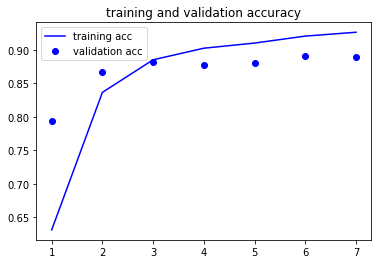

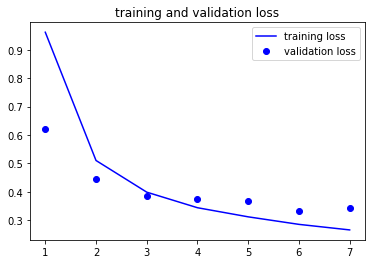

In [12]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure() #이건 새로운 figure 창을 띄우는 method
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
imdb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
result=imdb.fit(x_train, train_label, epochs=15,batch_size=64, validation_split=0.15,callbacks=[early_stopping]) 

Epoch 1/15
333/333 [==============================] - 2s 7ms/step - loss: 0.9322 - acc: 0.5896 - val_loss: 0.6781 - val_acc: 0.7136
Epoch 2/15
333/333 [==============================] - 2s 6ms/step - loss: 0.5395 - acc: 0.8136 - val_loss: 0.4474 - val_acc: 0.8651
Epoch 3/15
333/333 [==============================] - 2s 6ms/step - loss: 0.4149 - acc: 0.8768 - val_loss: 0.4589 - val_acc: 0.8309
Epoch 4/15
333/333 [==============================] - 2s 7ms/step - loss: 0.3565 - acc: 0.8974 - val_loss: 0.3762 - val_acc: 0.8781
Epoch 5/15
333/333 [==============================] - 2s 7ms/step - loss: 0.3224 - acc: 0.9084 - val_loss: 0.3574 - val_acc: 0.8869
Epoch 6/15
333/333 [==============================] - 2s 6ms/step - loss: 0.2931 - acc: 0.9181 - val_loss: 0.3408 - val_acc: 0.8885
Epoch 7/15
333/333 [==============================] - 2s 6ms/step - loss: 0.2778 - acc: 0.9241 - val_loss: 0.3336 - val_acc: 0.8888
Epoch 8/15
333/333 [==============================] - 2s 6ms/step - loss: 0.

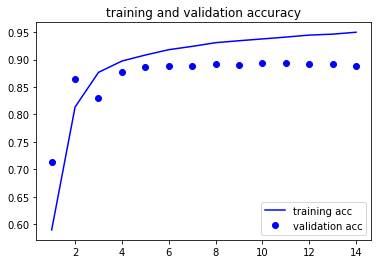

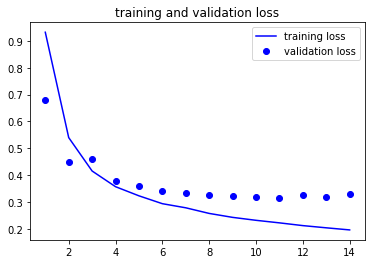

In [0]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure() #이건 새로운 figure 창을 띄우는 method
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

# 2. GLOVE

### 1) 기존방법

In [0]:
#pip install pyprind
import pyprind
import pandas as pd
import os
import numpy as np
imdb_dir='C:/Users/82104/Desktop/aclImdb/aclImdb'
labels={'pos':1, 'neg':0}

In [0]:
pbar=pyprind.ProgBar(50000)
df=pd.DataFrame()
print(df)
print('----------------------------------')
print(pbar)

Empty DataFrame
Columns: []
Index: []
----------------------------------
Title: 
  Started: 04/16/2020 21:22:43
  Finished: 04/16/2020 21:22:43
  Total time elapsed: 00:00:00


In [0]:
for data_type in ('test', 'train'):
    for label_type in ('pos','neg'):
        path=os.path.join(imdb_dir,data_type,label_type)
        for file in os.listdir(path):
            with open(os.path.join(path,file),'r', encoding='utf-8') as infile: # encoding 반드시 써주기.
                txt=infile.read() #한꺼번에 데이터를 텍스트로 읽음.
            df=df.append([[txt,labels[label_type]]], ignore_index=True) #다 찾아보면서 이해해보기.
            pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:05:38


In [0]:



df.columns=['review', 'sentiment']
print(df.head())
print(df.shape)
df=df.reindex(np.random.permutation(df.index))

# numpy data의 경우,
# np.random.shuffle(data) + #np.random.shuffle(labels)


# pandas 데이터일 경우, 
# data.sample(frac=1).reset_index(drop=True) 
# or data.reindex(np.random.permutation(data.index))


#pandas일때와 numpy일때 자료를 섞는 방법이 다르므로, 꼭 숙지. 



# 데이터 받는과정 보는중.
# http://mng.bz/0tIo 

                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1
(50000, 2)


In [0]:
print(df.index)
df.head()

Int64Index([13683, 42779, 34645, 12182, 32170, 10854, 46955, 41870, 43081,
             8371,
            ...
            12269, 46028, 44821, 27649, 44700, 20314, 29064, 39111, 32693,
            42638],
           dtype='int64', length=50000)


,review,sentiment
13683,There seems to have been some money behind thi...,0
42779,"I understand the jokes quite well, they just a...",0
34645,I am and was very entertained by the movie. It...,1
12182,The role of economics in the industrialized No...,1
32170,"Honestly, I was expecting to HATE this one, an...",1


In [0]:
# import os
# os.chdir('C:/Users/82104/Desktop')
# df.to_csv('imdb.csv')

In [0]:
# 읽는건 
# df2 = pd.read_csv('imdb.csv',index_col=0)

In [0]:
# df2.head()

,review,sentiment
13683,There seems to have been some money behind thi...,0
42779,"I understand the jokes quite well, they just a...",0
34645,I am and was very entertained by the movie. It...,1
12182,The role of economics in the industrialized No...,1
32170,"Honestly, I was expecting to HATE this one, an...",1


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
training_samples=25000
validation_samples=10000 
max_words=10000 #실제로는 9999 #이는, 만개의 input노드를 의미하며, 단어공간을 만개로 정의하는것을 의미.
maxlen=100 #문장당 100개씩 잘라볼거임.
token=Tokenizer(num_words=max_words)

In [0]:
token.fit_on_texts(df['review'].values) # .value 는 index가 사라지면서 값만나옴. numpy로 나옴.

In [0]:
sequence=token.texts_to_sequences(df['review'].values)
word_index=token.word_index
print(len(word_index))

124252


In [0]:
labels=df['sentiment'].values 
data=pad_sequences(sequence, maxlen=maxlen)
print(data.shape)
print(labels.shape)

(50000, 100)
(50000,)


In [0]:
# numpy data의 경우,
# np.random.shuffle(data) + # np.random.shuffle(labels)


# pandas 데이터일 경우, 
# data.sample(frac=1).reset_index(drop=True) 
# or data.reindex(np.random.permutation(data.index))


#pandas일때와 numpy일때 자료를 섞는 방법이 다르므로, 꼭 숙지. 


x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+10000]
y_val=labels[training_samples:training_samples+10000]
x_test=data[training_samples+10000:]
y_test=labels[training_samples+10000:]

In [0]:
# glove 모형에 의해 이미 만들어진 word embedding은 다음의 주소에서 다운받는다.
# https://nlp.stanford.edu/projects/glove -> glove.6B.zip 다운받음.

#50차원, 100차원, 200차원, 300차원 4가지 word embedding 벡터를 제공함.
# 우리는 이중 100차원을 사용함. (dense matrix) / 차원이 크면 클수록 문맥적 의미를 더 잘 고려하는 
# embedding을 불러옴. 
# 즉, 40만개의 단어중, 100 x 100의 dense matrix 로 표현한 모형을 불러옴.

glove_dir='C:/Users/82104/Desktop/glove.6B'
embedding_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF8') # utf-8이 맞는표현

# glove.6B.100d.txt 는 각 줄마다 첫번째에 text값, 이어지는 100개의 열에는 text에 해당하는 dense vector가 있음.

for line in f:
    values=line.split()
    word=values[0]
    seq=np.asarray(values[1:],dtype='float32') # 1번은 100개의 dim으로 word embedding진행.
    embedding_index[word]=seq # 함수화시킴.
f.close
print(len(embedding_index)) #40만개의 words에 대한 100개의 feature들이 있음.

400000


In [0]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim)) # dense vector를 100개로, 우리가 다루기로 했었음.
for word,i in word_index.items(): # dict였음.
    if i<max_words:
        embedding_vector=embedding_index.get(word) 
        # glove 이용과정. imdb의 10000개 데이터에 대한것들만 를 glove 모수에 계산함.
        # 마치 pre-training 하듯.
        
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [0]:
embedding_matrix.shape

(10000, 100)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Flatten,Dropout
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen)) # 1만개였고, 100개의 노드 -> 100만
# max_words = 1만 , embedding_dim = 100 (텍스트에서 100을 썻으므로) , input_length = 100 (시간스텝- 설정한 window size)

model_gl.add(Flatten())
model_gl.add(Dropout(0.3))
model_gl.add(Dense(1,activation='sigmoid'))
model_gl.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_17 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 10000)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 10001     
Total params: 1,010,001
Trainable params: 1,010,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_gl.layers[0].set_weights([embedding_matrix]) # glove에 통과시켜 만든 embedding matrix
model_gl.layers[0].trainable=False # trainable하지 않게. 즉, 10001개만 학습시킴.

In [0]:
model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
gl_result=model_gl.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_val,y_val)) 
model_gl.save_weights('C:/Users/ysp/Desktop/딥러닝 프로그램/glove_model.h5')                 

Train on 25000 samples, validate on 10000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.7066 - acc: 0.6281 - val_loss: 0.9267 - val_acc: 0.5683
Epoch 2/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.6168 - acc: 0.6999 - val_loss: 0.7735 - val_acc: 0.6339
Epoch 3/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.5941 - acc: 0.7211 - val_loss: 0.6138 - val_acc: 0.7066
Epoch 4/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.5749 - acc: 0.7366 - val_loss: 0.5868 - val_acc: 0.7229
Epoch 5/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.5638 - acc: 0.7422 - val_loss: 0.6242 - val_acc: 0.7133
Epoch 6/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.5731 - acc: 0.7418 - val_loss: 0.7582 - val_acc: 0.6765
Epoch 7/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.5704 - acc: 0.7459 - val_loss: 0.6380 - val_acc

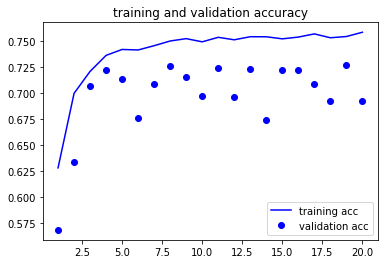

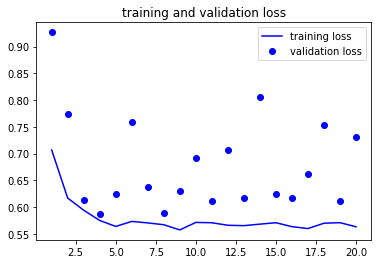

In [0]:
import matplotlib.pyplot as plt
acc=gl_result.history['acc']
val_acc=gl_result.history['val_acc']
loss=gl_result.history['loss']
val_loss=gl_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

# glove를 써도 생각보다 안좋은 경우가 많다.
# 그래서 텍스트에 특화된 embedding을 사용하는 경우가 많다.
# overfitting 치료방법도 생각해야함.
# mlp층을 넣는다는지, dropout 사용, 마지막 층 노드 줄이기, 
# time step을 500개로 늘려보기. normalization 하지말기.

#dropout 비율도 변경해보기.

In [0]:
loss,acc=model_gl.evaluate(x_test,y_test)
print(loss)
print(acc)

15000/15000 [==============================] - 1s 35us/step
0.7352235678990682
0.6937999725341797


In [0]:
#제 6장의 과제 마감날은 23일 오후 2시입니다. 23일 당일만 e-mail로 과제를 제출해야 합니다.

#1. time steps를 100에서 500으로 증가시킬 것. 이전학습에서도 동일하게 time steps를 증가하여 학습시킬 것

#2. dropout를 이용하여 과대적합문제를 해결할 것

#3. 다른 사항은 강의 녹화를 듣고 반영할 것

### 2) overfitting 줄인 방법

In [0]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/6/data

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/6/data


In [0]:
import pandas as pd
df = pd.read_csv('imdb/imdb.csv',index_col=0)

In [0]:
df.head()

,review,sentiment
13683,There seems to have been some money behind thi...,0
42779,"I understand the jokes quite well, they just a...",0
34645,I am and was very entertained by the movie. It...,1
12182,The role of economics in the industrialized No...,1
32170,"Honestly, I was expecting to HATE this one, an...",1


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
training_samples=25000
validation_samples=10000 
max_words=10000 #실제로는 9999 #이는, 만개의 input노드를 의미하며, 단어공간을 만개로 정의하는것을 의미.
maxlen=500 #문장당 100개씩 잘라볼거임.
token=Tokenizer(num_words=max_words)

In [0]:
token.fit_on_texts(df['review'].values) # .value 는 index가 사라지면서 값만나옴. numpy로 나옴.

In [0]:
df['review'].values[0]

'There seems to have been some money behind this film, but it would be impossible to imagine a film this badly planned and executed if I hadn\'t actually started watching it.<br /><br />To begin with, once we are in the cavern with the characters (the usual young adult stereotypes we\'ve been meeting in horror films since the early \'80s), the film is shot almost entirely in close-up. Since the actors are wearing helmet lights, this means all we see are glaring lights alternating with utter darkness - we never get to see what the characters see; so when they shout out "Look there!" we are left to beg "What?! Where?!". Ultimately the film has a nauseating, confusing strobe-light effect, with no sense to it until we get to the end.<br /><br />And I won\'t tell you what \'the end\' means - but you will recognize it if you\'ve ever seen the old early \'60s Arch Hall laugh fest"Eegah!" with Richard Kiel.<br /><br />But what crazy person would ever want to make a variation on a theme like "E

In [0]:
sequence=token.texts_to_sequences(df['review'].values)
word_index=token.word_index
print(len(word_index))

124252


In [0]:
labels=df['sentiment'].values 
data=pad_sequences(sequence, maxlen=maxlen)
print(data.shape)
print(labels.shape)

(50000, 500)
(50000,)


In [0]:
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+10000]
y_val=labels[training_samples:training_samples+10000]
x_test=data[training_samples+10000:]
y_test=labels[training_samples+10000:]

In [0]:
print(x_train.shape) 
print(x_val.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_val.shape) 
print(y_test.shape) 

(25000, 500)
(10000, 500)
(15000, 500)
(25000,)
(10000,)
(15000,)


In [0]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/6/data'

In [0]:
import os
embedding_index={}
f=open('glove.6B/glove.6B.100d.txt',encoding='UTF8') # utf-8이 맞는표현

# glove.6B.100d.txt 는 각 줄마다 첫번째에 text값, 이어지는 100개의 열에는 text에 해당하는 dense vector가 있음.

for line in f:
    values=line.split()
    word=values[0]
    seq=np.asarray(values[1:],dtype='float32') # 1번은 100개의 dim으로 word embedding진행.
    embedding_index[word]=seq # dict에 할당함. 
f.close
print(len(embedding_index)) #40만개의 words에 대한 100개의 feature들이 있음.

400000


In [0]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim)) # dense vector를 100개로, 우리가 다루기로 했었음.
for word,i in word_index.items(): # dict였음.
    if i<max_words:
        embedding_vector=embedding_index.get(word) 
        # glove 이용과정. imdb의 10000개 데이터에 대한것들만 를 glove 모수에 계산함.
        # 마치 pre-training 하듯.
        
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [0]:
embedding_matrix.shape

(10000, 100)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Flatten,Dropout
from tensorflow.keras.regularizers import l1,l2
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen)) # 1만개였고, 100개의 노드 -> 100만
# max_words = 1만 , embedding_dim = 100 (텍스트에서 100을 썻으므로) , input_length = 100 (시간스텝- 설정한 window size)

model_gl.add(Flatten())
model_gl.add(Dropout(0.5))
model_gl.add(Dense(256,activation='tanh'))
model_gl.add(Dropout(0.5))
model_gl.add(Dense(64,activation='tanh'))
model_gl.add(Dropout(0.5))
model_gl.add(Dense(1,activation='sigmoid',kernel_regularizer=l1(0.001)))
model_gl.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 500, 100)          1000000   
_________________________________________________________________
flatten_14 (Flatten)         (None, 50000)             0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 50000)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               12800256  
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)              

In [0]:
model_gl.layers[0]

In [0]:
model_gl.layers[0].set_weights([embedding_matrix]) # glove에 통과시켜 만든 embedding matrix 
# 이렇게 weight를 주게 된다. (초기값으로)

model_gl.layers[0].trainable=False # trainable하지 않게. 즉, 10001개만 학습시킴. // 하위 인자가 layers로 되어있으면, trainable method를 쓸 수 있음.

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping('val_loss',mode='min',patience=3)

In [0]:
model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
gl_result=model_gl.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val),callbacks=[early_stopping])  

Epoch 1/30
782/782 [==============================] - 12s 15ms/step - loss: 0.7663 - acc: 0.5066 - val_loss: 0.6930 - val_acc: 0.5166
Epoch 2/30
782/782 [==============================] - 12s 15ms/step - loss: 0.6876 - acc: 0.5478 - val_loss: 0.6572 - val_acc: 0.6071
Epoch 3/30
782/782 [==============================] - 12s 15ms/step - loss: 0.6378 - acc: 0.6465 - val_loss: 0.5970 - val_acc: 0.6847
Epoch 4/30
782/782 [==============================] - 12s 15ms/step - loss: 0.6077 - acc: 0.6766 - val_loss: 0.5781 - val_acc: 0.7017
Epoch 5/30
782/782 [==============================] - 12s 15ms/step - loss: 0.5848 - acc: 0.6992 - val_loss: 0.5727 - val_acc: 0.7066
Epoch 6/30
782/782 [==============================] - 12s 15ms/step - loss: 0.5654 - acc: 0.7170 - val_loss: 0.5616 - val_acc: 0.7155
Epoch 7/30
782/782 [==============================] - 12s 15ms/step - loss: 0.5521 - acc: 0.7287 - val_loss: 0.5815 - val_acc: 0.7044
Epoch 8/30
782/782 [==============================] - 12s 15ms

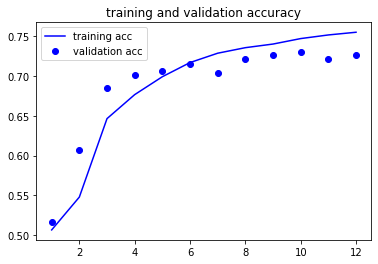

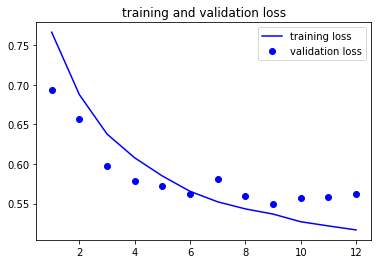

In [0]:
import matplotlib.pyplot as plt
acc=gl_result.history['acc']
val_acc=gl_result.history['val_acc']
loss=gl_result.history['loss']
val_loss=gl_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
loss,acc=model_gl.evaluate(x_test,y_test)

469/469 [==============================] - 2s 4ms/step - loss: 0.5575 - acc: 0.7272
0.557548463344574
0.7271999716758728
